# SVR - Support Vector Regression (Python)
---

<img src='../Imagenes/SVR.png' style='width:12%;height:12%;float:left;margin-right:20px'>
Los SVR utilizan una función (denominada función de Núcleo o ___kernel___) para mapear los puntos del conjunto de datos disponibles a otra dimensión donde estos sean linealmente separables. 

Si imaginamos un espacion en 2D con puntos de 2 clases distintas, la función de núcleo podría levantar a estos puntos a un espacio en 3D donde estos puntos de distintas clases podrían separarse por un plano.


## Escenario del problema
---

<img src='../Imagenes/entrevista.png' style='width:8%;height:8%;float:left;margin-right:20px'>
Vamos a contratar un nuevo empleado. Nos ha dicho que en su anterior empresa fue Manager Regional durante 2 años y que cobraba 170.000€ al año. Queremos determinar hasta que punto nos dice la verdad para poder negociar con él el salario que queremos ofrecerle en su nuevo puesto.  
¡Vamos a ello!

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [13]:
# 2. Importar datos
datos = pd.read_csv('../Datos/4.1.Salarios2.csv')
datos.head(10)

,Posicion,Nivel,Salario
0,Analista,1,45000
1,Consultor Junior,2,50000
2,Consultor Senior,3,60000
3,Manager,4,80000
4,Manager General,5,110000
5,Manager Regional,6,150000
6,Socio,7,200000
7,Socio Senior,8,300000
8,Nivel-C,9,500000
9,CEO,10,1000000


In [74]:
# 3. Crear variable y respuesta
X = datos['Nivel'].values.reshape(-1,1)
y = datos['Salario'].values

In [75]:
# 4. Separar en Entranamiento y Validación
'''
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)
'''

"\nX_train, X_test, y_train, y_test = separar(X, y, test_size=0.3, random_state=0)\nprint('La forma de X_train es: ', X_train.shape)\nprint('La forma de y_train es: ', y_train.shape)\nprint('La forma de X_test es: ', X_test.shape)\nprint('La forma de y_test es: ', y_test.shape)\n"

**Recordatorio:** no hacemos división de conjuntos porque tenemos muy pocos datos y nuestra intención es hacer una predicción lo más precisa posible.

In [76]:
# 5. Escalar los datos 
# SVR no es un algoritmo muy utilizado por eso la librería no lo escala automáticamente
# Probar a ver los resultados sin escalar a ver qué pasa!
escaladorX = MinMaxScaler()
X = escaladorX.fit_transform(X)

escaladorY = MinMaxScaler()
y = escaladorY.fit_transform(y.reshape(-1, 1))

/Users/pablorr10/miniconda3/envs/datascience/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [77]:
# 6. Ajustar el Modelo
from sklearn.svm import SVR
regresor = SVR(kernel='rbf')
regresor.fit(X, y.reshape(-1,))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
# 7. Hacer las predicciones (predicciones -> y_pred)
x_pred = escaladorX.transform(np.array([[6.5]])) # Espera un array
y_fit = regresor.predict(X).reshape(-1,1) # Valores ajustados durante el entrenamiento
y_pred = regresor.predict(x_pred).reshape(1,1)  # Valores resultantes con la nueva información

In [79]:
# 8. Desescalar para ver los valores reales
y = escaladorY.inverse_transform(y)
y_fit = escaladorY.inverse_transform(y_fit) 
x_pred = escaladorX.inverse_transform(x_pred)
y_pred = escaladorY.inverse_transform(y_pred)
X = escaladorX.inverse_transform(X)

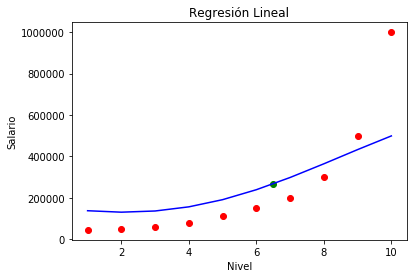

Para un nivel 6.5 cobraría  [[ 267620.35887985]]


In [80]:
# 8. Echemos un vistazo a la pinta que tienen nuestros ajustes
plt.scatter(X, y, color = 'red')
plt.plot(X, y_fit, color = 'blue')
plt.scatter(x_pred, y_pred, color='green')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()
print('Para un nivel 6.5 cobraría ', y_pred)

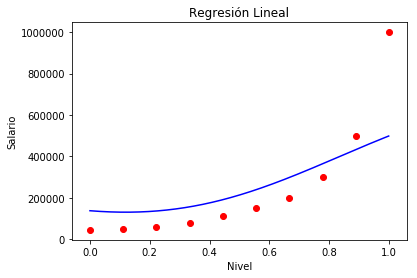

Para un nivel 6.5 cobraría  [[ 267620.35887985]]


In [84]:
# 9. Podemos aumentar la resolución del gráfico generando X más pequeños y prediciendo para cada uno de ellos
X = datos['Nivel'].values.reshape(-1,1)
X = escaladorX.transform(X)
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape(-1, 1)
y_grid = regresor.predict(X_grid)
y_grid = escaladorY.inverse_transform(y_grid.reshape(-1,1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_grid, color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()
print('Para un nivel 6.5 cobraría ', y_pred)

In [82]:
# 10. Cálculo del error
from statsmodels.tools.eval_measures import rmse
RMSE = np.sum(rmse(y, y_fit))/len(y)
print('RMSE = ', RMSE)

RMSE =  17620.9301068


# Conclusión
---
Hemos visto como la RP establece una relación polinómica entre la variable independiente (predictor) y la variable dependiente (respuesta) en función de los datos disponibles en el conjunto de entrenamiento, y como aplica esta función para obtener nuevas prediciones con la nueva información disponible en el conjunto de validación.

Hemos visto como en ciertas ocasiones la relaciones entre dichas variables no es lineal, y por lo tanto no podemos confiar en un regresor lineal, y podremos encontrar un regresor polinómico que se ajuste a los datos mucho mejor. ¡Pero mucho cuidado con el sobre ajuste!